bedtools intersect -a WGS.hg38.strelka2.unpadded.bed -b  WGS.hg38.mutect2.vardict.unpadded.bed | bedtools intersect -a - -b WGS.hg38.lancet.unpadded.bed | bedtools intersect -a - -b whole_exome_agilent_designed_120.targetIntervals.Gh38.bed | bedtools intersect -a - -b whole_exome_agilent_plus_tcga_6k.targetIntervals.Gh38.bed | bedtools intersect -a - -b whole_exome_agilent_1.1_refseq_plus_3_boosters.targetIntervals.liftover_Gh38.bed > BED_intersected_with_PBTAWGS_and_TCGA.bed


gunzip *maf.gz


In [13]:
import pandas as pd
import numpy as np
import os 

This was run both for any file pbta-tcga*maf. and pbta-snv*maf

In [66]:
for file in os.listdir("."):
    if file.startswith("pbta-tcga") and file.endswith("maf"):
        out = file.replace("maf", "bed")
        maf = pd.read_csv(file, sep="\t",skiprows=1)
        BED = maf.loc[maf["Start_Position"]==maf["End_Position"]][["Chromosome","Start_Position", "End_Position", "Variant_Classification", "Tumor_Sample_Barcode"]]
        BED["Start_Position"] = BED["Start_Position"] -1
        BED.to_csv(out, sep="\t", header=None, index=False)



/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Intersecting both with final BED file - 

for i in `ls pbta-tcga*bed`; do out=$(echo $i | sed 's/.bed/_BED_intersected_with_PBTAWGS_and_TCGA.bed/g'); bedtools intersect -a $i -b BED_intersected_with_PBTAWGS_and_TCGA.bed -wa > $out;echo $out; done


for i in `ls pbta-snv*bed`; do out=$(echo $i | sed 's/.bed/_BED_intersected_with_PBTAWGS_and_TCGA.bed/g'); bedtools intersect -a $i -b BED_intersected_with_PBTAWGS_and_TCGA.bed -wa > $out;echo $out; done


In [ ]:
Counting number of SNVs per samples 
Ran this for both "pbta-tcga" and "pbta-snv"



In [70]:
# Using groupby and count() to count number of SNVs under each sample

for file in os.listdir("."):
    if file.startswith("pbta-snv") and file.endswith("vep_BED_intersected_with_PBTAWGS_and_TCGA.bed"):
        out = file.replace("vep_BED_intersected_with_PBTAWGS_and_TCGA.bed", "counting_SNV_numpersamples.txt")
        BED = pd.read_csv(file, sep="\t", header=None)
        BED = BED.groupby(4).count()[0]
        #print(BED.head())
        BED.to_csv(out, sep="\t", header=None, index=True)
        


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':


In [105]:
import matplotlib.pyplot as plt



In [101]:
pbta_lancet = pd.read_csv("pbta-snv-lancet.counting_SNV_numpersamples.txt",  header=None, sep="\t")
tcga_lancet = pd.read_csv("pbta-tcga-snv-lancet.counting_SNV_numpersamples.txt", header=None, sep="\t")

pbta_mutect2 = pd.read_csv("pbta-snv-mutect2.counting_SNV_numpersamples.txt",  header=None, sep="\t")
tcga_mutect2 = pd.read_csv("pbta-tcga-snv-mutect2.counting_SNV_numpersamples.txt", header=None, sep="\t")

pbta_strelka2 = pd.read_csv("pbta-snv-strelka2.counting_SNV_numpersamples.txt",  header=None, sep="\t")
tcga_strelka2 = pd.read_csv("pbta-tcga-snv-strelka2.counting_SNV_numpersamples.txt", header=None, sep="\t")


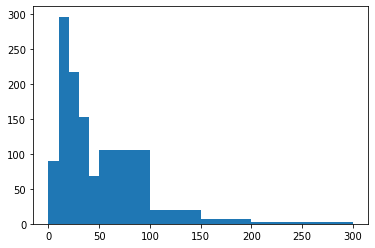

In [97]:
plt.hist(pbta_lancet[1], bins=[0, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300])
plt.savefig('pbta_lancet_hist.png')
#plt.xlim(0,1000)

#list(pbta_lancet[1])

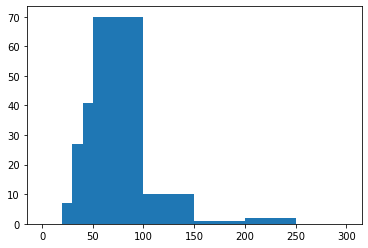

In [98]:
plt.hist(tcga_lancet[1], bins=[0, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300])
plt.savefig('tcga_lancet_hist.png')

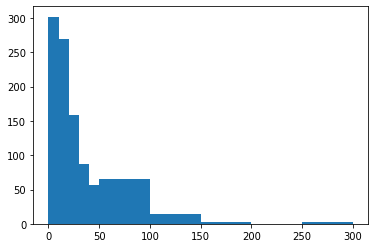

In [99]:
plt.hist(pbta_mutect2[1], bins=[0, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300])
plt.savefig('pbta_mutect2_hist.png')


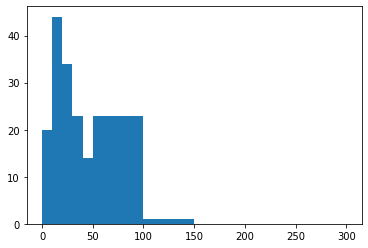

In [100]:
plt.hist(tcga_mutect2[1], bins=[0, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300])
plt.savefig('tcga_mutect2_hist.png')


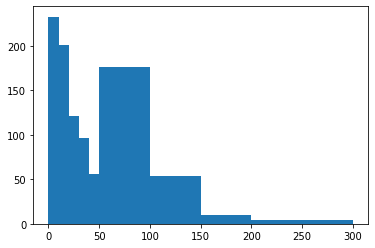

In [103]:
plt.hist(pbta_strelka2[1], bins=[0, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300])
plt.savefig('pbta_strelka2_hist.png')




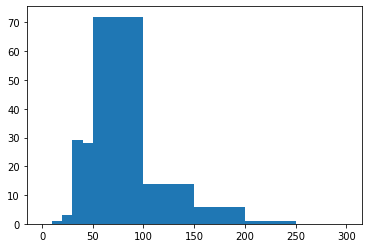

In [104]:

plt.hist(tcga_strelka2[1], bins=[0, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300])
plt.savefig('tcga_strelka2_hist.png')